In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# gsw oceanic toolbox: http://www.teos-10.org/pubs/Getting_Started.pdf
import gsw
from scipy.io import loadmat
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import sys
import os
sys.path.append('../..')
from src.features.processing_func import check_coords, calc_N2_kappa, calc_hab, arctic_calchab
from src.utils.directories import get_parent_directory
from src.features.calc_seaice import calc_SIC

import warnings
import datetime as datetime
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
parent_dir = get_parent_directory()
SI_HadISST = os.path.join(parent_dir, "data/external/SI-area/HadISST_ice.nc")
Hadi_SI = xr.open_dataset(SI_HadISST)

In [3]:
# the Arctic pickle file loaded after load_ds
arctic_all = pd.read_pickle(os.path.join(parent_dir, "data/processed/ml_ready/1906_time.pkl"))

In [4]:
arctic_mix = os.path.join(parent_dir, "data/interim/arctic_mix.nc")
asbo_nc = os.path.join(parent_dir, "data/interim/ASBO-TEACOSI_ds.nc")
mosaic_nc = os.path.join(parent_dir, "data/interim/mosaic_ds.nc")
nice_nc = os.path.join(parent_dir, "data/interim/nice_ds.nc")
HM_nc = os.path.join(parent_dir, "data/interim/HM_ds.nc")
barneo2007_nc = os.path.join(parent_dir, "data/interim/barneo2007_ds.nc")
barneo2008_nc = os.path.join(parent_dir, "data/interim/barneo2008_ds.nc")
KB2018616_nc = os.path.join(parent_dir, "data/interim/KB2018616.nc")
KH2018709_nc = os.path.join(parent_dir, "data/interim/KH2018709.nc")
ascos_nc = os.path.join(parent_dir, "data/interim/ascos_ds.nc")

arctic_ds = xr.open_dataset(arctic_mix)
asbo_ds = xr.open_dataset(asbo_nc)
mosaic_ds = xr.open_dataset(mosaic_nc)
nice_ds = xr.open_dataset(nice_nc)
HM_ds = xr.open_dataset(HM_nc)
barneo2007_ds = xr.open_dataset(barneo2007_nc)
barneo2008_ds = xr.open_dataset(barneo2008_nc)
KB2018616_ds = xr.open_dataset(KB2018616_nc)
KH2018709_ds = xr.open_dataset(KH2018709_nc)
ascos_ds = xr.open_dataset(ascos_nc)

# Plot epsilons

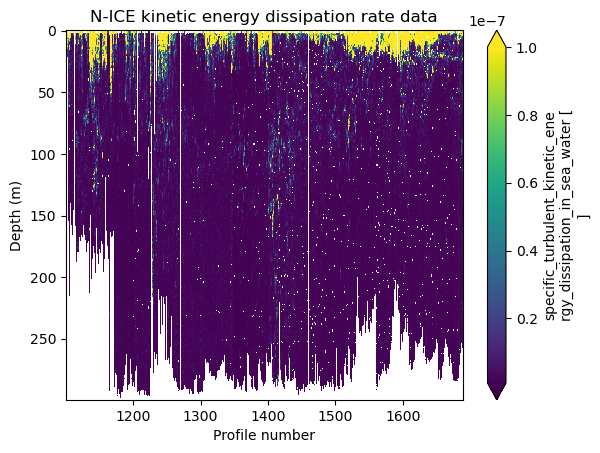

In [5]:
nice_ds.eps.plot(vmin= 1e-9, vmax=1e-7)
plt.gca().invert_yaxis() 
plt.title("N-ICE kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()

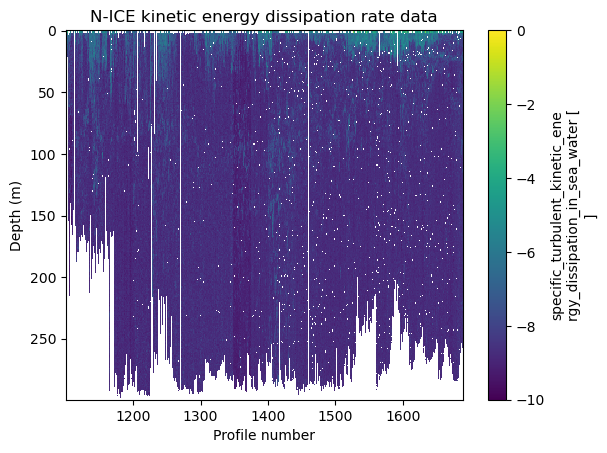

In [25]:
# Calculate logarithm of log_eps column
log_eps = np.log10(nice_ds['eps'])
nice_ds["log_eps"] = log_eps

nice_ds.log_eps.plot(vmin=-10, vmax=0)
plt.gca().invert_yaxis() 
plt.title("N-ICE kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()

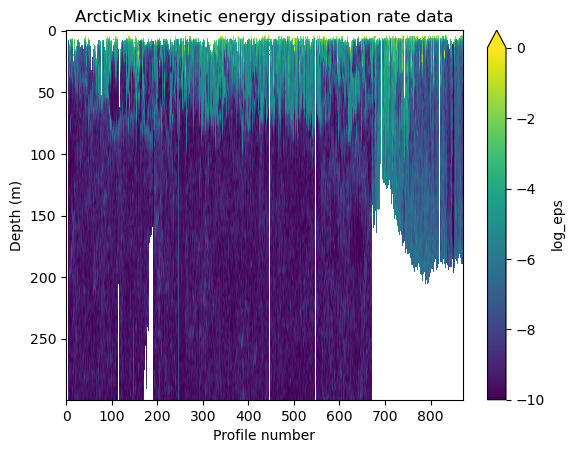

In [26]:
# Calculate logarithm of log_eps column
log_eps = np.log10(arctic_ds['eps'])
arctic_ds["log_eps"] = log_eps

arctic_ds.log_eps.plot(cmap="viridis", vmin=-10, vmax=0)
plt.gca().invert_yaxis() 
plt.title("ArcticMix kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()

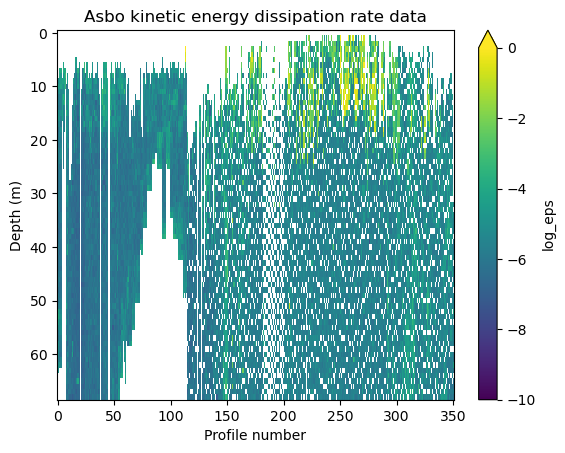

In [27]:
# Calculate logarithm of log_eps column
log_eps = np.log10(asbo_ds['eps'])
asbo_ds["log_eps"] = log_eps

asbo_ds.log_eps.plot(cmap="viridis", vmin=-10, vmax=0)
plt.gca().invert_yaxis() 
plt.title("Asbo kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()

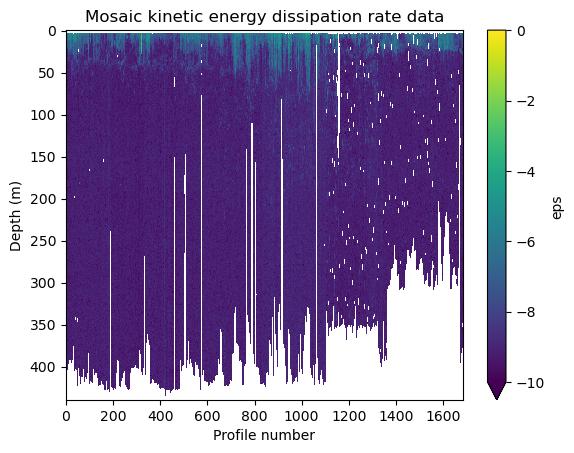

In [30]:
# is already in log
mosaic_ds.eps.plot(cmap="viridis", vmin=-10, vmax=0)
plt.gca().invert_yaxis() 
plt.title("Mosaic kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()

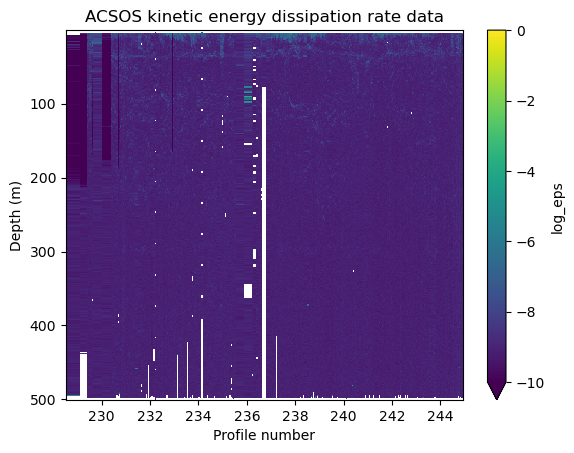

In [31]:
# Calculate logarithm of log_eps column
log_eps = np.log10(ascos_ds['eps'])
ascos_ds["log_eps"] = log_eps

ascos_ds.log_eps.plot(cmap="viridis", vmin=-10, vmax=0)
plt.gca().invert_yaxis() 
plt.title("ACSOS kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()

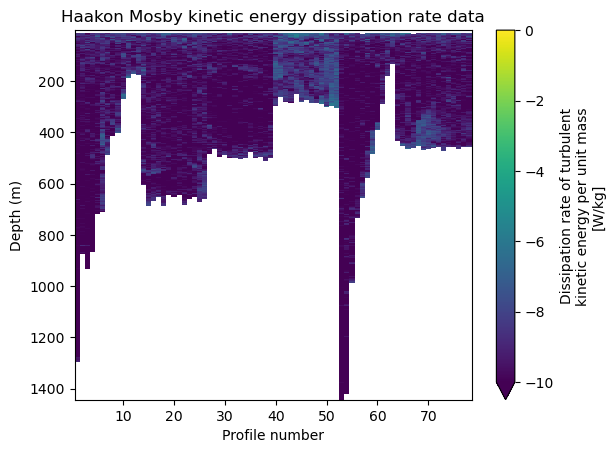

In [32]:
# Calculate logarithm of log_eps column
log_eps = np.log10(HM_ds['eps'])
HM_ds["log_eps"] = log_eps

HM_ds.log_eps.plot(cmap="viridis", vmin=-10, vmax=0)
plt.gca().invert_yaxis() 
plt.title("Haakon Mosby kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()

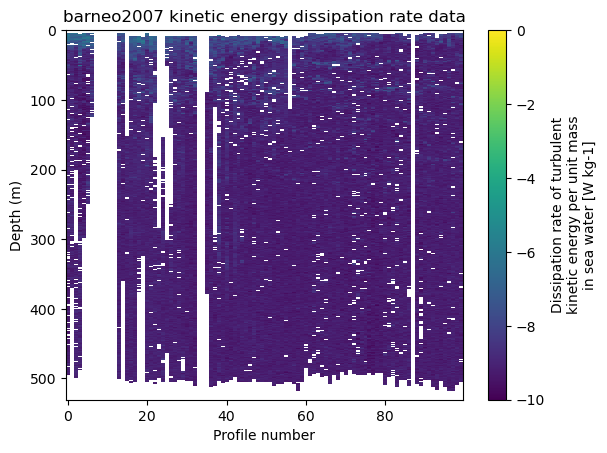

In [33]:
# Calculate logarithm of log_eps column
log_eps = np.log10(barneo2007_ds['eps'])
barneo2007_ds["log_eps"] = log_eps

barneo2007_ds.log_eps.plot(cmap="viridis", vmin=-10, vmax=0)
plt.gca().invert_yaxis() 
plt.title("barneo2007 kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()

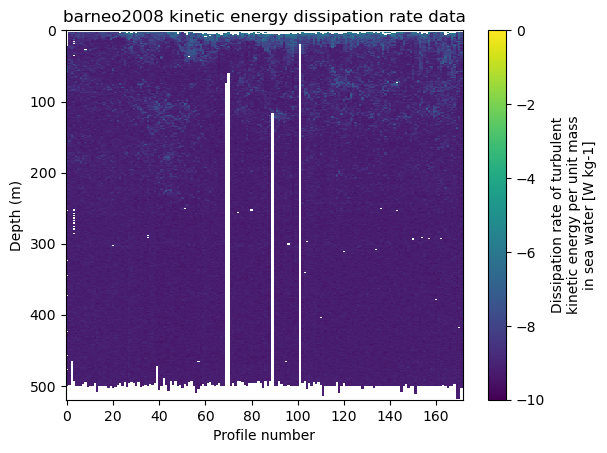

In [34]:
# Calculate logarithm of log_eps column
log_eps = np.log10(barneo2008_ds['eps'])
barneo2008_ds["log_eps"] = log_eps

barneo2008_ds.log_eps.plot(cmap="viridis", vmin=-10, vmax=0)
plt.gca().invert_yaxis() 
plt.title("barneo2008 kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()

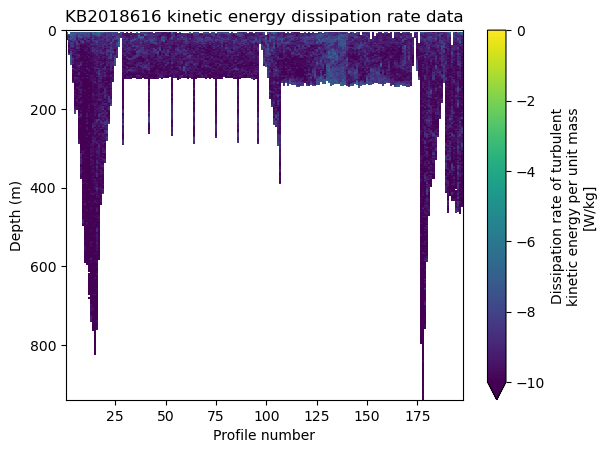

In [35]:
# Calculate logarithm of log_eps column
log_eps = np.log10(KB2018616_ds['eps'])
KB2018616_ds["log_eps"] = log_eps

KB2018616_ds.log_eps.plot(cmap="viridis", vmin=-10, vmax=0)
plt.gca().invert_yaxis() 
plt.title("KB2018616 kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()

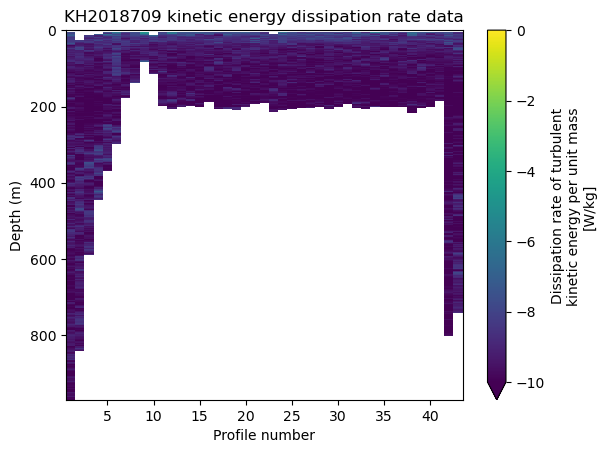

In [36]:
# Calculate logarithm of log_eps column
log_eps = np.log10(KH2018709_ds['eps'])
KH2018709_ds["log_eps"] = log_eps

KH2018709_ds.log_eps.plot(cmap="viridis", vmin=-10, vmax=0)
plt.gca().invert_yaxis() 
plt.title("KH2018709 kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()

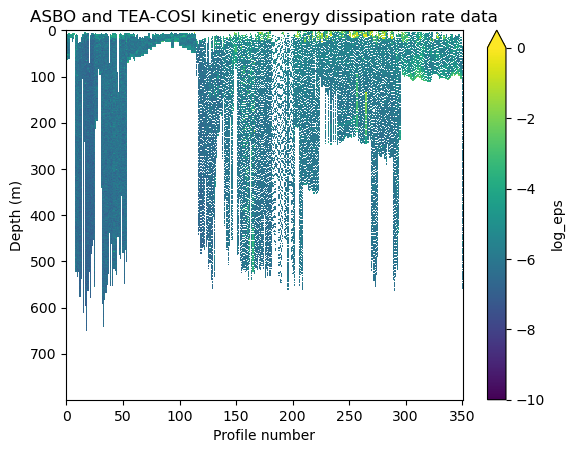

In [7]:
# Calculate logarithm of log_eps column
log_eps = np.log10(asbo_ds['eps'])
asbo_ds["log_eps"] = log_eps

asbo_ds.log_eps.plot(cmap="viridis", vmin=-10, vmax=0)
plt.gca().invert_yaxis() 
plt.title("ASBO and TEA-COSI kinetic energy dissipation rate data")
plt.xlabel("Profile number")
plt.ylabel("Depth (m)")
plt.show()